In [384]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tabulate

from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.pipeline import make_pipeline

#для расчета ROC-кривой
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

from sklearn.metrics import accuracy_score #доля правильных ответов в классификации
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#для визуализации корелляционной матрицы
import seaborn as sns

**Загрузим датасет и проверим на наличие нулевых значений.**

In [385]:
housing = datasets.fetch_california_housing(as_frame = True)
print(housing.data.shape, housing.target.shape)

(20640, 8) (20640,)


In [386]:
print(fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [387]:
housing = datasets.fetch_california_housing(as_frame=True)
housing_df = housing.data
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [388]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


Пропуски в данных отсутствуют.

**Разделите выборку на обучающее и тестовое подмножества.**

In [389]:
X = housing_df
y = housing.target.astype(int)
print(len(X))
print(y)

20640
0        4
1        3
2        3
3        3
4        3
        ..
20635    0
20636    0
20637    0
20638    0
20639    0
Name: MedHouseVal, Length: 20640, dtype: int32


In [390]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Строим модель линейной регрессии и обучаем ее.**

In [391]:
model = make_pipeline(
StandardScaler(),
LogisticRegression(max_iter=1000))

#обучаем модель
model.fit(X_train,y_train)
predictions = model.predict(X_test)
predictions[:100]
model.predict_proba(X_test)

array([[7.53387652e-01, 2.42968161e-01, 3.54904346e-03, 9.23270792e-05,
        2.71241640e-06, 1.03597875e-07],
       [1.27873594e-01, 6.33885230e-01, 2.05313062e-01, 2.75065105e-02,
        4.37927682e-03, 1.04232632e-03],
       [3.85548024e-03, 1.01233646e-01, 3.44495054e-01, 1.94944097e-01,
        1.88131594e-01, 1.67340129e-01],
       ...,
       [1.07981666e-08, 2.85366937e-04, 4.33249033e-02, 2.34878325e-01,
        2.07185676e-01, 5.14325718e-01],
       [5.14000128e-01, 4.59624002e-01, 2.50277395e-02, 1.19828423e-03,
        1.41649775e-04, 8.19606694e-06],
       [3.19570945e-02, 6.41278689e-01, 2.72237868e-01, 4.93454608e-02,
        4.03827221e-03, 1.14261552e-03]])

**Вычислите метрики RMSE, R2.**

In [368]:
# Расчет RMSE
rmse_1 = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE1:", rmse_1)

# Расчет R2
r2_1 = r2_score(y_test, predictions)
print("R2:", r2_1)

RMSE1: 0.9652388546425325
R2: 0.405914856749908


In [392]:
X_1 = list(X.columns)

**Построим график распределения целевой переменной.**

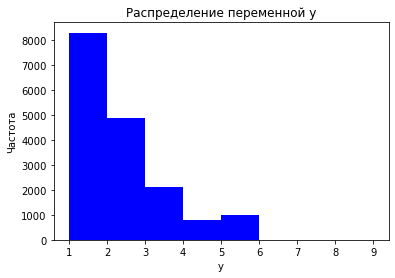

In [393]:
# Создаем гистограмму распределения переменной y
plt.hist(y, bins=range(1, 10), color='blue')
plt.xlabel('y')
plt.ylabel('Частота')
plt.title('Распределение переменной y')
plt.show()


Распределение значений целевой переменной смещено вправо к значениям между 1 и 2.

Выбросы на данной диаграмме однозначно не выявлены.

**Посчитаем и выведем корреляционную матрицу.**

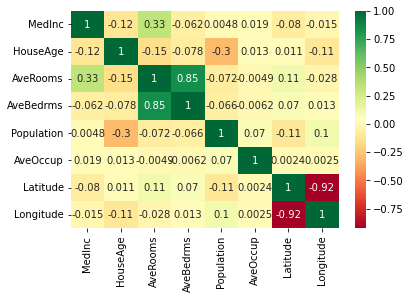

In [394]:
sns.heatmap(X.corr(), annot=True, cmap='RdYlGn')
plt.show()


На основании полученной корреляционной матрицы можно сделать вывод, что между парами признаков "AveBedrms и AveRooms"; "Latitude и Longitude" есть сильная корреляция.
Поэтому удалим из выборки признаки AveBedrms и Latitude.

In [395]:
del X['AveBedrms']
del X['Latitude']

**Разделим скорректированный набор данных на тестовую и тренировочную выборки, построим модель линейной регрессии и обучим ее.**

In [396]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [397]:
model = make_pipeline(
StandardScaler(),
LogisticRegression(max_iter=1000))

#обучаем модель
model.fit(X_train,y_train)
predictions = model.predict(X_test)
predictions[:100]
model.predict_proba(X_test)

array([[5.54627302e-01, 4.09151981e-01, 3.28466305e-02, 3.20450372e-03,
        1.44781522e-04, 2.48019673e-05],
       [2.84625495e-01, 5.61920604e-01, 1.29655576e-01, 1.92803780e-02,
        3.56680063e-03, 9.51146231e-04],
       [2.83851709e-02, 1.66386215e-01, 3.90529809e-01, 1.69353480e-01,
        1.44831417e-01, 1.00513907e-01],
       ...,
       [5.22140173e-07, 1.32542403e-03, 7.67564793e-02, 2.63989167e-01,
        1.92572354e-01, 4.65356053e-01],
       [2.23043229e-01, 5.48853831e-01, 1.80625304e-01, 3.58619866e-02,
        8.62973621e-03, 2.98591259e-03],
       [9.34705841e-02, 6.26711050e-01, 2.33830627e-01, 4.23654906e-02,
        2.82028831e-03, 8.01960655e-04]])

**Вычислите метрики RMSE, R2.**

In [379]:
# Расчет RMSE
rmse_2 = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE:", rmse_2)

# Расчет R2
r2_2 = r2_score(y_test, predictions)
print("R2:", r2_2)

RMSE: 0.8845683921043513
R2: 0.5010673393921484


In [398]:
X_2 = list(X.columns)

**Исследуем оставленные признаки на выбросы.**

In [399]:
X.head()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Longitude
0,8.3252,41.0,6.984127,322.0,2.555556,-122.23
1,8.3014,21.0,6.238137,2401.0,2.109842,-122.22
2,7.2574,52.0,8.288136,496.0,2.802260,-122.24
3,5.6431,52.0,5.817352,558.0,2.547945,-122.25
4,3.8462,52.0,6.281853,565.0,2.181467,-122.25


In [400]:
for column in ['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Longitude']:
    # Определение квантилей
    q1, q3 = X[column].quantile([0.25, 0.75])
    iqr = q3 - q1

    # Определение верхнего и нижнего выброса
    upper_outlier = q3 + 1.5   *   iqr
    lower_outlier = q1 - 1.5   *   iqr

    # Проверка наличия выбросов
    has_upper_outliers = X[column].max() > upper_outlier
    has_lower_outliers = X[column].min() < lower_outlier

    print(f"Наличие верхних выбросов в поле '{column}':", has_upper_outliers)
    print(f"Наличие нижних выбросов в поле '{column}':", has_lower_outliers)
    print(' ')


Наличие верхних выбросов в поле 'MedInc': True
Наличие нижних выбросов в поле 'MedInc': False
 
Наличие верхних выбросов в поле 'HouseAge': False
Наличие нижних выбросов в поле 'HouseAge': False
 
Наличие верхних выбросов в поле 'AveRooms': True
Наличие нижних выбросов в поле 'AveRooms': True
 
Наличие верхних выбросов в поле 'Population': True
Наличие нижних выбросов в поле 'Population': False
 
Наличие верхних выбросов в поле 'AveOccup': True
Наличие нижних выбросов в поле 'AveOccup': True
 
Наличие верхних выбросов в поле 'Longitude': False
Наличие нижних выбросов в поле 'Longitude': False
 


In [401]:
for column in ['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Longitude']:
    # Определение квантилей
    q1, q3 = X[column].quantile([0.25, 0.75])
    iqr = q3 - q1

    # Определение верхнего и нижнего выброса
    upper_outlier = q3 + 1.5    *    iqr
    lower_outlier = q1 - 1.5    *    iqr

    # Проверка наличия выбросов
    has_upper_outliers = X[column].max() > upper_outlier
    if has_upper_outliers == 'True':
        X = X[(X[column] <= upper_outlier)]
    has_lower_outliers = X[column].min() < lower_outlier
    if has_lower_outliers == 'True':
        X = X[(X[column] >= lower_outlier)]

**Разделим скорректированный набор данных на тестовую и тренировочную выборки, построим модель линейной регрессии и обучим ее.**

In [402]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [403]:
model = make_pipeline(
StandardScaler(),
LogisticRegression(max_iter=1000))

#обучаем модель
model.fit(X_train,y_train)
predictions = model.predict(X_test)
predictions[:100]
model.predict_proba(X_test)

array([[5.54627302e-01, 4.09151981e-01, 3.28466305e-02, 3.20450372e-03,
        1.44781522e-04, 2.48019673e-05],
       [2.84625495e-01, 5.61920604e-01, 1.29655576e-01, 1.92803780e-02,
        3.56680063e-03, 9.51146231e-04],
       [2.83851709e-02, 1.66386215e-01, 3.90529809e-01, 1.69353480e-01,
        1.44831417e-01, 1.00513907e-01],
       ...,
       [5.22140173e-07, 1.32542403e-03, 7.67564793e-02, 2.63989167e-01,
        1.92572354e-01, 4.65356053e-01],
       [2.23043229e-01, 5.48853831e-01, 1.80625304e-01, 3.58619866e-02,
        8.62973621e-03, 2.98591259e-03],
       [9.34705841e-02, 6.26711050e-01, 2.33830627e-01, 4.23654906e-02,
        2.82028831e-03, 8.01960655e-04]])

**Вычислите метрики RMSE, R2.**

In [380]:
# Расчет RMSE
rmse_3 = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE:", rmse_3)

# Расчет R2
r2_3 = r2_score(y_test, predictions)
print("R2:", r2_3)

RMSE: 0.8845683921043513
R2: 0.5010673393921484


In [404]:
X_3 = list(X.columns)

**Преобразуем математически некоторые признаки из выборки.**

In [405]:
for column in ['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Longitude']:
    
    column_min = X[column].min()
    column_max = X[column].max()

    print(f"Минимальное значение признака '{column}':", column_min)
    print(f"Максимальное значение признака '{column}':", column_max)
    print(' ')

Минимальное значение признака 'MedInc': 0.4999
Максимальное значение признака 'MedInc': 15.0001
 
Минимальное значение признака 'HouseAge': 1.0
Максимальное значение признака 'HouseAge': 52.0
 
Минимальное значение признака 'AveRooms': 0.8461538461538461
Максимальное значение признака 'AveRooms': 141.9090909090909
 
Минимальное значение признака 'Population': 3.0
Максимальное значение признака 'Population': 35682.0
 
Минимальное значение признака 'AveOccup': 0.6923076923076923
Максимальное значение признака 'AveOccup': 1243.3333333333333
 
Минимальное значение признака 'Longitude': -124.35
Максимальное значение признака 'Longitude': -114.31
 


In [420]:
# Возведем в квадрат значения признака 'Longitude', чтобы избавиться от знаков "-"
X['Longitude'] = X['Longitude'] ** 2

# Вычислим квадратный корень из значений признака 'AveRooms', чтобы нормализовать их
X['AveRooms'] = X['AveRooms'] ** 0.5

# Вычислим натуральный логаримф от значений признака 'Population', чтобы нормализовать их
X['Population'] = np.log(X['Population'])

# Вычислим натуральный логаримф от значений признака 'AveOccup', чтобы нормализовать их
X['AveOccup'] = np.log(X['AveOccup'])

**Разделим скорректированный набор данных на тестовую и тренировочную выборки, построим модель линейной регрессии и обучим ее.**

In [407]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [408]:
model = make_pipeline(
StandardScaler(),
LogisticRegression(max_iter=1000))

#обучаем модель
model.fit(X_train,y_train)
predictions = model.predict(X_test)
predictions[:100]
model.predict_proba(X_test)

array([[5.75037902e-01, 4.09623826e-01, 1.50617898e-02, 2.69575345e-04,
        6.68345260e-06, 2.22692271e-07],
       [2.89527300e-01, 5.72482912e-01, 1.22867841e-01, 1.34806506e-02,
        1.43162898e-03, 2.09666924e-04],
       [6.87872450e-04, 6.91316647e-03, 8.55089196e-02, 2.00052293e-01,
        2.32460397e-01, 4.74377351e-01],
       ...,
       [8.45716214e-08, 3.28291658e-04, 4.32339169e-02, 2.45238443e-01,
        2.17682320e-01, 4.93516944e-01],
       [2.21186601e-01, 5.59032020e-01, 1.83531993e-01, 3.08491661e-02,
        4.48346254e-03, 9.16757148e-04],
       [8.47865549e-02, 7.19715301e-01, 1.86287508e-01, 8.80079608e-03,
        3.81389507e-04, 2.84505663e-05]])

**Вычислите метрики RMSE, R2.**

In [361]:
# Расчет RMSE
rmse_4 = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE:", rmse_4)

# Расчет R2
r2_4 = r2_score(y_test, predictions)
print("R2:", r2_4)

RMSE: 0.8727129579516648
R2: 0.5143516145662275


In [409]:
X_4 = list(X.columns)

**Выводы.**

Для обучения были выполнены следующие преобразовани я датасета:

1) удалены признаки с высокой корреляцией с признаками, использующимися для обучения в итоговом датасете, как избыточные
2) удалены выбросы признаков на основании расчета квантилей
3) выполнены преобразования признаков с целью нормализации и исключения свойств не несущих "физического" смысла.

b. Сравните метрики всех моделей. Желательно оформление в виде таблицы вида |модель|RMSE|R2|признаки, на которых проводилось обучение с указанием их преобразований|.
c. Напишите свое мнение, в полной ли мере модели справились с поставленной задачей.

In [419]:
# Создаём список с данными для таблицы
data = [['Модель', 'RMSE', 'R2', 'Признаки'],
        ['Линейная регрессия 1', rmse_1, r2_1, f"{X_1} - без преобразований"],
        ['Линейная регрессия 2', rmse_2, r2_1, f"{X_2} - исключены признаки с большой корреляцией"],
        ['Линейная регрессия 3', rmse_3, r2_1, f"{X_3} - исключены признаки с большой корреляцией и выбросы"],
        ['Линейная регрессия 4', rmse_4, r2_1, f"{X_4} - исключены признаки с большой корреляцией и выбросы, сделаны математические преобразования"]]

# Форматируем таблицу
table = tabulate.tabulate(data, headers='firstrow', tablefmt='grid')

# Выводим таблицу
print(table)

data = pd.DataFrame(data, columns=['Модель', 'RMSE', 'R2', 'Признаки'])
data = data.drop(data.index[0], axis=0)
data['RMSE'] = data['RMSE'].astype('float')
data['R2'] = data['R2'].astype('float')

min_index_RMSE = data['RMSE'].idxmin()
min_index_R2 = data['R2'].idxmin()

print(f"Наилучший результат по метрике качества RMSE показал метод {data.loc[data['RMSE'].idxmin(), 'Модель']}.")
print(f"По метрике качества R2 все модели показали одинаковый результат.")

+----------------------+----------+----------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Модель               |     RMSE |       R2 | Признаки                                                                                                                                                              |
+======================+==========+==========+=======================================================================================================================================================================+
| Линейная регрессия 1 | 0.965239 | 0.405915 | ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'] - без преобразований                                               |
+----------------------+----------+----------+----------------------------------------------------------------------------------------------

По сравнительной таблице можно увидеть, что выполненные преобразования начального датасета позволили улучшить качество модели.

На мой взгляд задача была выполнена в полной мере.